## Quality and average educational outcomes? Point in time and time series analysis

#### Motivation: We can observe how do various characteristics impact average country score ina PISA tests (standardized to 500, sd=100), we can do this both at one pont in time and over time (I am thinking of doinf regression for each ear, maybye  choosing best model via BMA od just looking at VIF + also looking how did this ecolve over time - doing both Panel data and diff)

#### Data: Educational attainment - PISA results 2018
source: https://www.kaggle.com/datasets/walassetomaz/pisa-results-2000-2022-economics-and-education?fbclid=IwAR0nhho9IQWbNfibLL37Mw4-FTkk3hucoGOKQtljpEHF2M0WQCQY0w-dE5IaZqZDT7O8n4

main economic question: What are main drivers of academic achievement given the data that we have? 



In [164]:
#install.packages("openxlsx")
#library(openxlsx)

In [165]:
# install.packages("xlsx")
library(xlsx)

data <- read.xlsx("economics_and_education_dataset_XLSX.xlsx", 1)  # 1 is the sheet index
head(data)

index_code,expenditure_on._education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,10.5,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,BOY,527
AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,10.5,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,GIRL,522
AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,10.5,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,TOT,524
AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,10.6,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,BOY,527
AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,10.6,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,GIRL,513
AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,10.6,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,TOT,520


In [126]:
# Rename a column using colnames()
colnames(data)[colnames(data) == "expenditure_on._education_pct_gdp"] <- "educ_exp"
# Verify the change
head(data)
#maybye drop NAs?

index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,10.5,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,BOY,527
AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,10.5,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,GIRL,522
AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,10.5,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,TOT,524
AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,10.6,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,BOY,527
AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,10.6,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,GIRL,513
AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,10.6,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,TOT,520


In [127]:
# we will have to adjust the dataset
# Convert from factor to numeric where needed
data$educ_exp <- as.numeric(as.character(data$educ_exp))
data$gini_index <- as.numeric(as.character(data$gini_index))
data$intentional_homicides <- as.numeric(as.character(data$intentional_homicides ))
data$tax_revenue <- as.numeric(as.character(data$tax_revenue ))
data$taxes_on_income_profits_capital <- as.numeric(as.character(data$taxes_on_income_profits_capital ))
data$alcohol_consumption_per_capita <- as.numeric(as.character(data$alcohol_consumption_per_capita ))

# Check the structure of the data to confirm the change
str(data)

'data.frame':	634 obs. of  20 variables:
 $ index_code                           : Factor w/ 214 levels "AUS-2003","AUS-2006",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ educ_exp                             : num  5.25 5.25 5.25 4.74 4.74 ...
 $ mortality_rate_infant                : num  4.9 4.9 4.9 4.7 4.7 4.7 4.2 4.2 4.2 3.6 ...
 $ gini_index                           : num  33.5 33.5 33.5 33.5 33.5 33.5 33.5 33.5 33.5 33.5 ...
 $ gdp_per_capita_ppp                   : num  30122 30122 30122 34847 34847 ...
 $ inflation_consumer_prices            : num  2.73 2.73 2.73 3.56 3.56 ...
 $ intentional_homicides                : num  1.53 1.53 1.53 1.37 1.37 ...
 $ unemployment                         : num  5.93 5.93 5.93 4.79 4.79 ...
 $ gross_fixed_capital_formation        : num  26.1 26.1 26.1 27.8 27.8 ...
 $ population_density                   : num  2.57 2.57 2.57 2.66 2.66 ...
 $ suicide_mortality_rate               : num  10.5 10.5 10.5 10.6 10.6 10.6 11.2 11.2 11.2 11.7 ...
 $ tax_revenue  

In [128]:
#we will start with observing only effect on all individuals together, later we will also explore differences between males and females
data_f <- subset(data, sex=="TOT")
head(data_f)

,index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
3,AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.5330728,5.933,26.05029,2.567036,10.5,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,TOT,524
6,AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.3729398,4.785,27.78913,2.662089,10.6,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,TOT,520
9,AUS-2009,5.081320,4.2,33.5,40312.40,1.771117,1.2141698,5.565,27.60185,2.823588,11.2,22.02101,64.95108,NA,6.244110,85.063,AUS,2009,TOT,514
12,AUS-2012,4.866670,3.6,33.5,42866.60,1.762780,1.0691061,5.225,27.40417,2.959200,11.7,21.09748,65.51731,NA,6.179476,85.402,AUS,2012,TOT,504
15,AUS-2015,5.315520,3.3,33.5,46292.10,1.508367,0.9907542,6.055,26.20234,3.100113,13.2,21.86642,64.89343,10.3903,7.234067,85.701,AUS,2015,TOT,494
18,AUS-2018,5.124310,3.2,34.3,50251.34,1.911401,0.8847350,5.300,24.36526,3.245345,12.4,23.17720,65.16415,NA,7.203527,86.012,AUS,2018,TOT,491


In [129]:
summary(data_f)

    index_code     educ_exp     mortality_rate_infant   gini_index   
 AUS-2003:  1   Min.   :3.040   Min.   : 1.900        Min.   :24.40  
 AUS-2006:  1   1st Qu.:4.454   1st Qu.: 3.000        1st Qu.:28.30  
 AUS-2009:  1   Median :5.042   Median : 3.700        Median :32.50  
 AUS-2012:  1   Mean   :5.208   Mean   : 5.062        Mean   :33.52  
 AUS-2015:  1   3rd Qu.:5.767   3rd Qu.: 5.100        3rd Qu.:35.20  
 AUS-2018:  1   Max.   :8.449   Max.   :25.300        Max.   :57.60  
 (Other) :208                                                        
 gdp_per_capita_ppp inflation_consumer_prices intentional_homicides
 Min.   :  9588     Min.   :-4.4781           Min.   : 0.0000      
 1st Qu.: 26081     1st Qu.: 0.7999           1st Qu.: 0.8336      
 Median : 34306     Median : 1.9801           Median : 1.0955      
 Mean   : 36177     Mean   : 2.3008           Mean   : 3.1191      
 3rd Qu.: 42994     3rd Qu.: 2.9912           3rd Qu.: 1.8424      
 Max.   :116499     Max.   :21.6

## Point in time analysis - 2018

In [130]:
#now, we will look first at point in time analysis, looking at latest year we have data on, which is 2018,
#we will also check robustness/ sensitivity of our findings by running regression on data from 2015
data_2018 <- subset(data_f, time=="2018")

head(data_2018)
summary(data_2018)


,index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
18,AUS-2018,5.12431,3.2,34.3,50251.34,1.911401,0.8847350,5.300,24.36526,3.245345,12.4,23.17720,65.16415,NA,7.203527,86.012,AUS,2018,TOT,491
33,AUT-2018,5.22655,2.9,30.8,56937.94,1.998380,0.9727943,4.933,24.09513,107.131859,15.7,25.41750,27.48498,NA,7.705019,58.297,AUT,2018,TOT,499
51,BEL-2018,6.38107,3.4,27.2,52530.56,2.053165,NA,5.948,23.62267,377.379590,18.7,24.00857,34.00176,NA,8.333813,98.001,BEL,2018,TOT,508
69,CAN-2018,4.88898,4.6,32.5,49992.76,2.268226,1.7874861,5.837,22.67609,4.134149,12.0,13.05768,55.21804,NA,7.577101,81.411,CAN,2018,TOT,512
84,CHL-2018,5.47306,6.3,44.9,25564.54,2.434890,4.4114225,7.235,23.04979,25.152179,8.8,18.39552,36.67938,NA,4.654511,87.564,CHL,2018,TOT,417
88,COL-2018,4.44910,12.2,50.4,15161.32,3.240569,26.2313252,9.360,21.22787,44.413665,4.0,14.60984,26.56603,NA,5.460899,80.778,COL,2018,TOT,391


    index_code    educ_exp     mortality_rate_infant   gini_index   
 AUS-2018: 1   Min.   :3.078   Min.   : 1.900        Min.   :24.60  
 AUT-2018: 1   1st Qu.:4.261   1st Qu.: 2.700        1st Qu.:29.80  
 BEL-2018: 1   Median :4.930   Median : 3.300        Median :32.50  
 BRA-2018: 1   Mean   :5.080   Mean   : 4.215        Mean   :33.92  
 CAN-2018: 1   3rd Qu.:5.440   3rd Qu.: 4.050        3rd Qu.:35.30  
 CHE-2018: 1   Max.   :7.641   Max.   :13.500        Max.   :53.90  
 (Other) :33                                                        
 gdp_per_capita_ppp inflation_consumer_prices intentional_homicides
 Min.   : 14971     Min.   : 0.4884           Min.   : 0.2645      
 1st Qu.: 31968     1st Qu.: 1.5020           1st Qu.: 0.7087      
 Median : 42507     Median : 1.9535           Median : 1.0058      
 Mean   : 45149     Mean   : 2.3672           Mean   : 3.7799      
 3rd Qu.: 54359     3rd Qu.: 2.5242           3rd Qu.: 2.1178      
 Max.   :116499     Max.   :16.3325     

In [131]:
dims <- dim(data_2018)

# Using nrow() and ncol()
print(dims)
print(nrow(data_2018))

[1] 39 20
[1] 39


### OLS - choosing right variables

In [132]:
#full  OLS
ols_2018a <- lm(rating ~ educ_exp  + mortality_rate_infant+	gini_index + gdp_per_capita_ppp +	inflation_consumer_prices + unemployment + 
               +gross_fixed_capital_formation +	population_density	+log(suicide_mortality_rate)+log(tax_revenue)+	taxes_on_income_profits_capital
               + government_health_expenditure_pct_gdp + urban_population_pct_total, data = data_2018)
summary(ols_2018a)


Call:
lm(formula = rating ~ educ_exp + mortality_rate_infant + gini_index + 
    gdp_per_capita_ppp + inflation_consumer_prices + unemployment + 
    +gross_fixed_capital_formation + population_density + log(suicide_mortality_rate) + 
    log(tax_revenue) + taxes_on_income_profits_capital + government_health_expenditure_pct_gdp + 
    urban_population_pct_total, data = data_2018)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.6555  -6.9073   0.7327   6.8285  25.9729 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            5.551e+02  5.515e+01  10.065 4.33e-10
educ_exp                               5.831e-01  3.647e+00   0.160  0.87429
mortality_rate_infant                 -4.565e+00  1.875e+00  -2.435  0.02271
gini_index                            -2.410e+00  7.121e-01  -3.384  0.00245
gdp_per_capita_ppp                     1.180e-04  1.692e-04   0.697  0.49223
inflation_consumer_prices          

In [133]:
# step-by step removing the most useless variables 
#removing unemloyment and gross_fixed_capital_formation, keeping educ_exp for economic reasons (curious what happens later)
#updated  OLS
ols_2018b <- lm(rating ~ educ_exp  + mortality_rate_infant+	gini_index + gdp_per_capita_ppp +	inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+log(tax_revenue)+	taxes_on_income_profits_capital
               + government_health_expenditure_pct_gdp + urban_population_pct_total, data = data_2018)
summary(ols_2018b)


Call:
lm(formula = rating ~ educ_exp + mortality_rate_infant + gini_index + 
    gdp_per_capita_ppp + inflation_consumer_prices + +population_density + 
    log(suicide_mortality_rate) + log(tax_revenue) + taxes_on_income_profits_capital + 
    government_health_expenditure_pct_gdp + urban_population_pct_total, 
    data = data_2018)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5223  -7.9764   0.6634   7.1015  24.6199 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            5.635e+02  4.738e+01  11.894  5.1e-12
educ_exp                               4.803e-01  3.106e+00   0.155  0.87829
mortality_rate_infant                 -4.734e+00  1.740e+00  -2.721  0.01145
gini_index                            -2.398e+00  6.620e-01  -3.623  0.00124
gdp_per_capita_ppp                     1.070e-04  1.576e-04   0.679  0.50325
inflation_consumer_prices              3.142e+00  1.149e+00   2.735  0.01109
popul

In [134]:
# step-by step removing the most useless variables 
#removing government_health_expenditure_pct_gdp, keeping educ_exp for economic reasons (curious what happens later)
#updated  OLS
ols_2018c <- lm(rating ~ educ_exp  + mortality_rate_infant+	gini_index + gdp_per_capita_ppp +	inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+log(tax_revenue)+	taxes_on_income_profits_capital
               + urban_population_pct_total, data = data_2018)
summary(ols_2018c)


Call:
lm(formula = rating ~ educ_exp + mortality_rate_infant + gini_index + 
    gdp_per_capita_ppp + inflation_consumer_prices + +population_density + 
    log(suicide_mortality_rate) + log(tax_revenue) + taxes_on_income_profits_capital + 
    urban_population_pct_total, data = data_2018)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.2237  -8.2917   0.9655   6.8407  23.9722 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.680e+02  4.534e+01  12.528 9.21e-13 ***
educ_exp                         1.080e+00  2.678e+00   0.403 0.689828    
mortality_rate_infant           -4.778e+00  1.709e+00  -2.796 0.009423 ** 
gini_index                      -2.465e+00  6.309e-01  -3.907 0.000566 ***
gdp_per_capita_ppp               1.104e-04  1.549e-04   0.713 0.482071    
inflation_consumer_prices        3.087e+00  1.123e+00   2.749 0.010524 *  
population_density               4.527e-02  1.878e-02   2.410 0.

In [135]:
# step-by step removing the most useless variables 
#removing urban_population_pct_total, educ_exp
#updated  OLS
ols_2018d <- lm(rating ~ mortality_rate_infant+	gini_index + gdp_per_capita_ppp +	inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+ log(tax_revenue) +	taxes_on_income_profits_capital, data = data_2018)
summary(ols_2018d)


Call:
lm(formula = rating ~ mortality_rate_infant + gini_index + gdp_per_capita_ppp + 
    inflation_consumer_prices + +population_density + log(suicide_mortality_rate) + 
    log(tax_revenue) + taxes_on_income_profits_capital, data = data_2018)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.851  -9.015   1.390   7.423  26.984 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.627e+02  4.473e+01  12.580 2.85e-13 ***
mortality_rate_infant           -4.762e+00  1.692e+00  -2.815 0.008679 ** 
gini_index                      -2.675e+00  5.999e-01  -4.459 0.000114 ***
gdp_per_capita_ppp               7.335e-05  1.504e-04   0.488 0.629345    
inflation_consumer_prices        3.091e+00  1.112e+00   2.778 0.009483 ** 
population_density               3.679e-02  1.681e-02   2.188 0.036868 *  
log(suicide_mortality_rate)      1.620e+01  6.118e+00   2.647 0.012976 *  
log(tax_revenue)                -1.182e+01  

In [136]:
#simple  OLS
ols_2018 <- lm(rating ~ mortality_rate_infant+	gini_index + inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+	log(tax_revenue) + taxes_on_income_profits_capital, data = data_2018)
# Get the summary of the model
summary(ols_2018)


Call:
lm(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    +population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, data = data_2018)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.918  -8.790   1.042   7.886  26.472 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     568.00842   42.83794  13.259 4.43e-14 ***
mortality_rate_infant            -5.07481    1.54547  -3.284  0.00261 ** 
gini_index                       -2.67781    0.59220  -4.522 8.96e-05 ***
inflation_consumer_prices         3.11323    1.09732   2.837  0.00808 ** 
population_density                0.03782    0.01647   2.296  0.02882 *  
log(suicide_mortality_rate)      16.06388    6.03363   2.662  0.01235 *  
log(tax_revenue)                -12.33734    8.51025  -1.450  0.15752    
taxes_on_income_profits_capital   0.47918    0.17241   2.779  0.00931 ** 

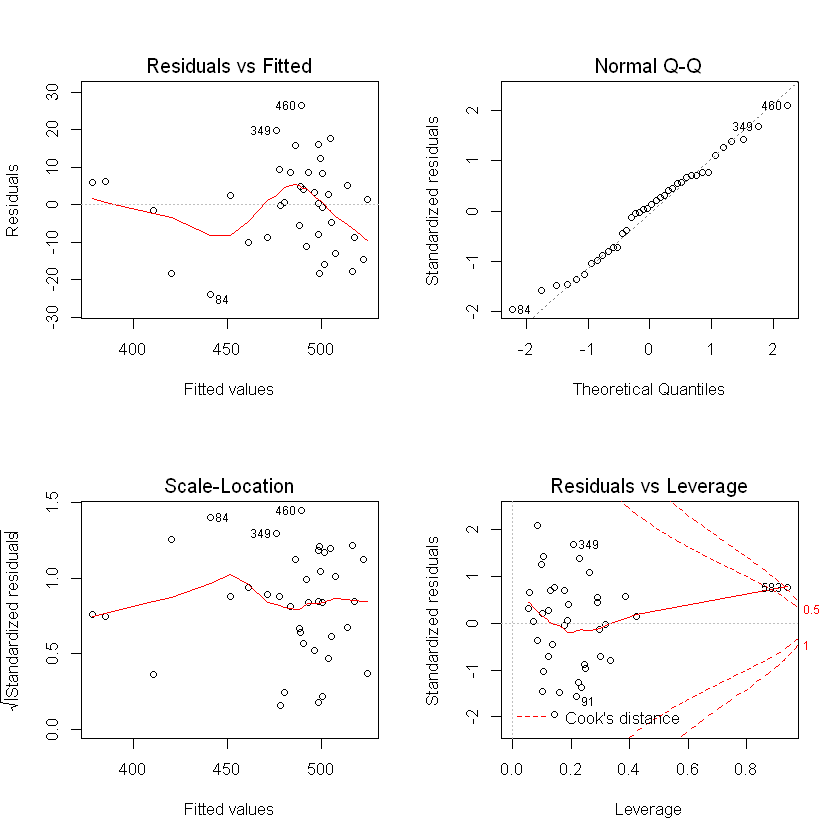

In [137]:
par(mfrow=c(2,2))
plot(ols_2018)

In [138]:
library(lmtest)
# Wald Test
wald_test <- waldtest(ols_2018a, test = "Chisq")
print(wald_test)

# Likelihood Ratio Test - Likelihood Ratio Test:
# If the p-value is less than your chosen significance level (usually 0.05), you reject the null hypothesis that the restricted model is true. 
# This means the restrictions imposed significantly reduce the model's explanatory power, and the unrestricted model is preferred. 
lr_test <- lrtest(ols_2018, ols_2018a)
print(lr_test)

Wald test

Model 1: rating ~ educ_exp + mortality_rate_infant + gini_index + gdp_per_capita_ppp + 
    inflation_consumer_prices + unemployment + +gross_fixed_capital_formation + 
    population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital + government_health_expenditure_pct_gdp + 
    urban_population_pct_total
Model 2: rating ~ 1
  Res.Df  Df  Chisq Pr(>Chisq)    
1     24                          
2     37 -13 222.54  < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Likelihood ratio test

Model 1: rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    +population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital
Model 2: rating ~ educ_exp + mortality_rate_infant + gini_index + gdp_per_capita_ppp + 
    inflation_consumer_prices + unemployment + +gross_fixed_capital_formation + 
    population_density + log(suicide_mortality_rate) + 

Wald test: The Wald test compares the full model against a reduced model (just the intercept). The extremely low p-value (< 2.2e-16) strongly suggests that the full model (Model 1) is significantly different from the baseline model (Model 2). In other words, the set of predictors included in Model 1 jointly contribute significantly to explaining the variability in the dependent variable rating. This result implies that at least some of the coefficients of the independent variables in Model 1 are significantly different from zero.

Wald test results: The test provides strong evidence in favor of Model 1 over Model 2. It suggests that the predictors included in Model 1 are collectively important in explaining the variation in the dependent variable. However, this test does not tell you which specific predictors are important. For that, you would need to look at the individual coefficients and their p-values in the regression output of Model 1. Remember, while the Wald test indicates the overall significance of the model, it's also important to consider the theoretical and practical relevance of each variable included in the model.

LM test results: Since the p-value is quite high (0.8369, much greater than the typical significance level of 0.05), it suggests that the null hypothesis cannot be rejected. In other words, the additional variables in Model 2 do not significantly improve the model's fit compared to Model 1.

-> Our model OLS_2018 is okay:)

In [139]:
### OLS: Finding right variables using VIF and 10 threshold

In [140]:
# Install and load car package
install.packages("car")
library(car)

also installing the dependencies 'RcppEigen', 'lme4'




  There are binary versions available but the source versions are later:
             binary    source needs_compilation
RcppEigen 0.3.3.9.1 0.3.3.9.4              TRUE
lme4         1.1-26  1.1-35.1              TRUE
car          3.0-10     3.1-2             FALSE

  Binaries will be installed
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Terstudy\AppData\Local\Temp\Rtmpg9pqN8\downloaded_packages


installing the source package 'car'



In [141]:
ols_2018a <- lm(rating ~ educ_exp  + mortality_rate_infant+	gini_index + gdp_per_capita_ppp +	inflation_consumer_prices + unemployment + 
               +gross_fixed_capital_formation +	population_density	+log(suicide_mortality_rate)+log(tax_revenue)+	taxes_on_income_profits_capital
               + government_health_expenditure_pct_gdp + urban_population_pct_total, data = data_2018)
vif_values <- vif(ols_2018a)
print(vif_values)
# everything is bellow 10, so no worries


                             educ_exp                 mortality_rate_infant 
                             3.036804                              5.519385 
                           gini_index                    gdp_per_capita_ppp 
                             4.718928                              1.994545 
            inflation_consumer_prices                          unemployment 
                             2.391045                              2.282011 
        gross_fixed_capital_formation                    population_density 
                             2.031953                              1.492868 
          log(suicide_mortality_rate)                      log(tax_revenue) 
                             2.572587                              1.721069 
      taxes_on_income_profits_capital government_health_expenditure_pct_gdp 
                             2.285328                              2.452992 
           urban_population_pct_total 
                             2.800594

##  checking the assumptions for OLS method in model ols_2018

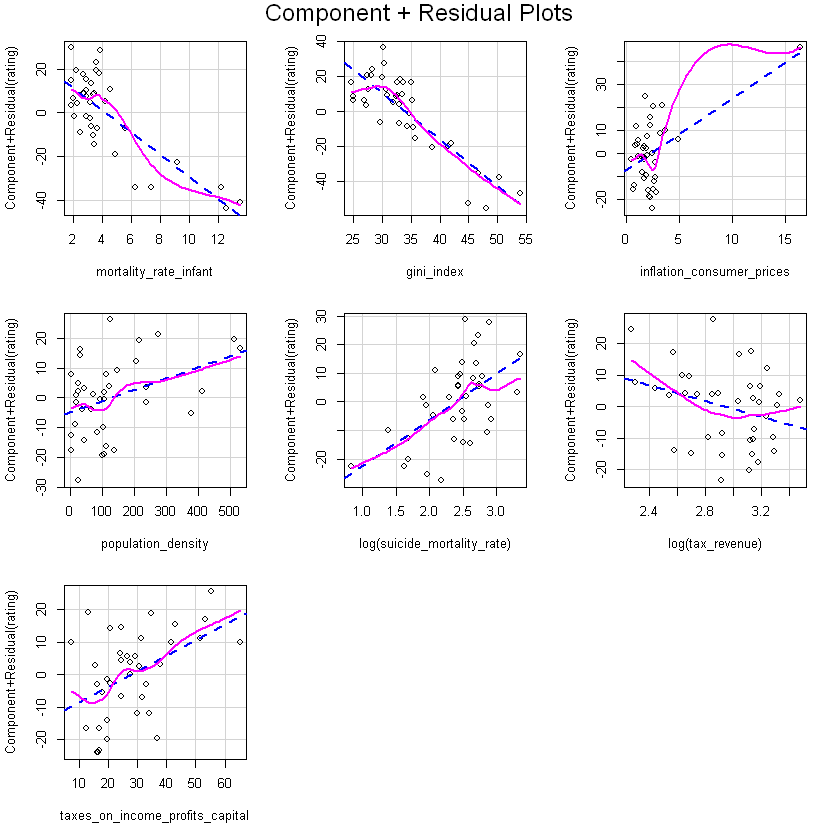

In [142]:
#Linearity: Check that the relationship between the predictors and the response variable is linear.
#This can be done using component-plus-residual plots (also known as partial residual plots).
crPlots(ols_2018)
#seems relatively okay, inflation doinf the worst, maybye use R squared??


	studentized Breusch-Pagan test

data:  ols_2018
BP = 4.671, df = 7, p-value = 0.7


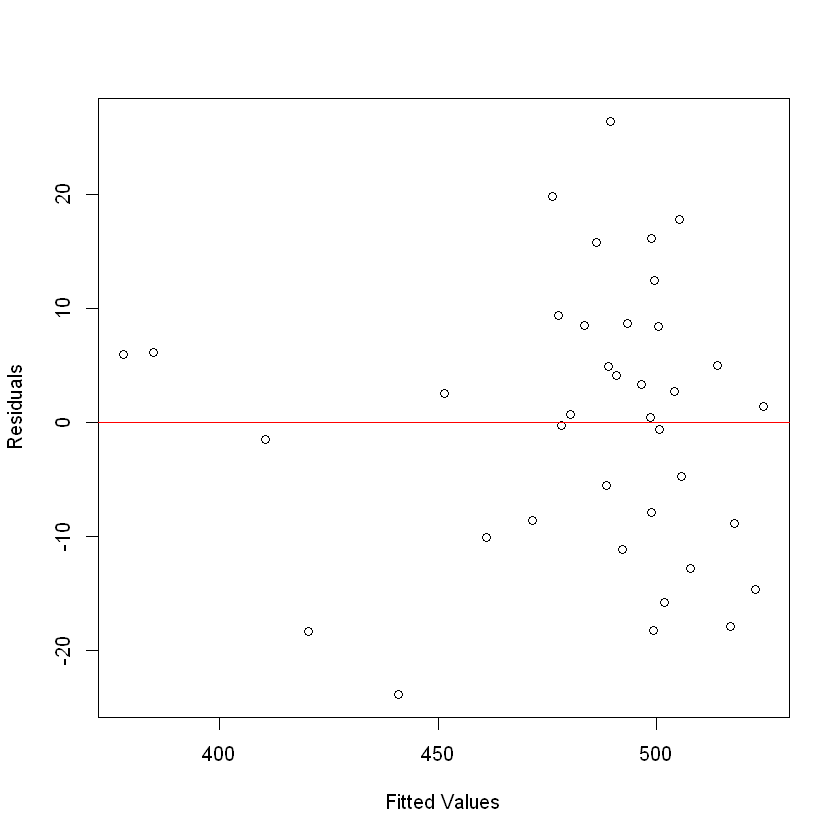

In [143]:
#Homoscedasticity: Check for constant variance of residuals. Use Breusch-Pagan test and plot residuals vs. fitted values.
bptest(ols_2018)

plot(ols_2018$fitted.values, residuals(ols_2018), xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red")
#no heteroscedasticity found!!


	Shapiro-Wilk normality test

data:  residuals(ols_2018)
W = 0.9844, p-value = 0.8636


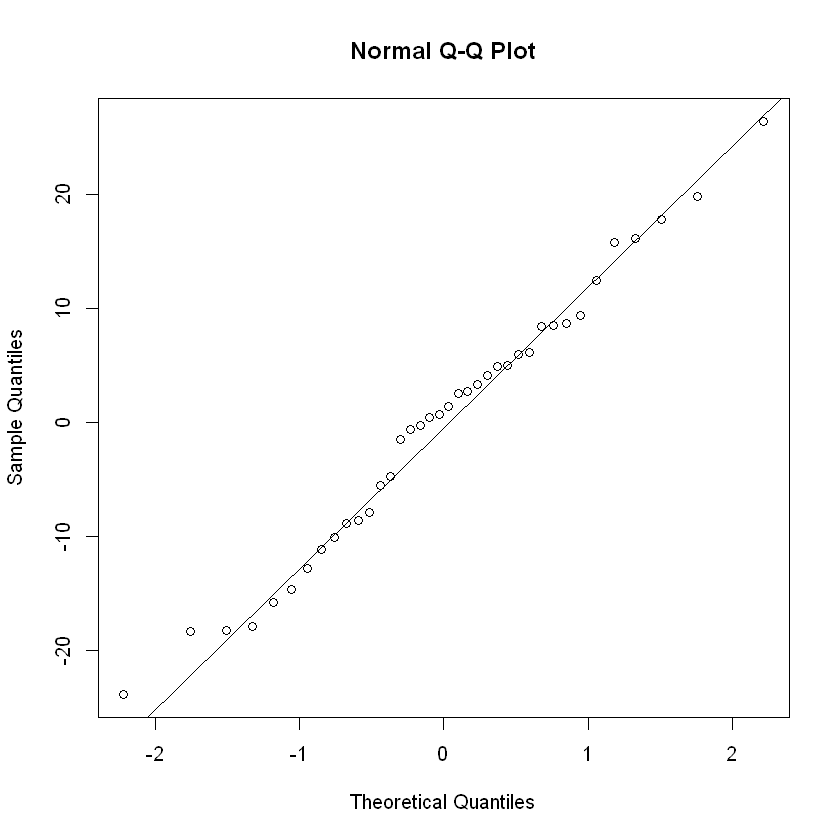

In [144]:
#Normality of Residuals: Test if residuals are normally distributed. Use Shapiro-Wilk test and Q-Q plot.
shapiro.test(residuals(ols_2018))
# high p-value indicates that there is not enough evidence to reject the null hypothesis of normality! Nice, we have normality

qqnorm(residuals(ols_2018))
qqline(residuals(ols_2018))

In [145]:
#Multicollinearity: Check for multicollinearity using Variance Inflation Factor (VIF).
vif(ols_2018)
# less than 10, seems OK!

mortality_rate_infant                      gini_index 
                       4.357903                        3.792250 
      inflation_consumer_prices              population_density 
                       1.578809                        1.053661 
    log(suicide_mortality_rate)                log(tax_revenue) 
                       1.998255                        1.402859 
taxes_on_income_profits_capital 
                       1.065935

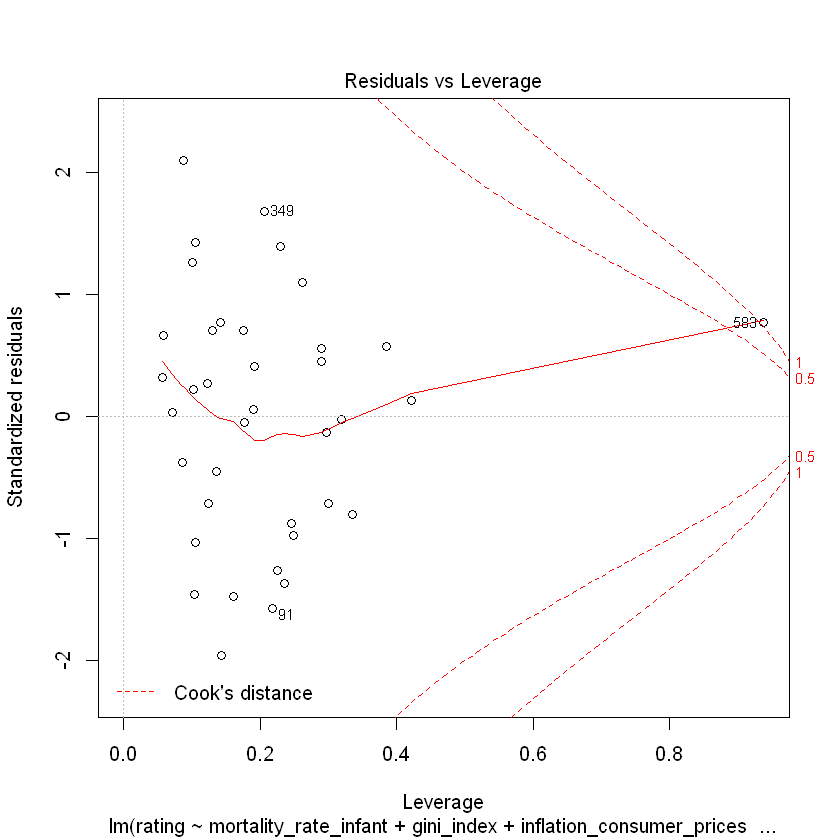

In [146]:
#Additional Plot for Diagnostics: A useful additional plot is the Residuals vs. Leverage plot to identify influential cases.
plot(ols_2018, which = 5)
# we do have some outliers, but we will keep them, as we have small sample and the value is not "accidental" for sure

Nice, it seems like there is no problem with our OLS regression! However, we will run regression in another year (2015) to check robustness of our findings.

###  2015 data OLS for robustness 

In [147]:
data_2015 <- subset(data_f, time=="2015")
head(data_2015)

,index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
15,AUS-2015,5.31552,3.3,33.5,46292.10,1.5083667,0.9907542,6.055,26.20234,3.100113,13.2,21.86642,64.89343,10.39030,7.234067,85.701,AUS,2015,TOT,494
30,AUT-2015,5.45658,3.0,30.5,49865.90,0.8965633,0.5091166,5.802,22.69671,104.734598,16.0,26.82617,28.70780,12.19174,7.511853,57.715,AUT,2015,TOT,497
48,BEL-2015,6.45157,3.4,27.7,46200.90,0.5614292,NA,8.482,22.96342,372.331440,18.6,24.35454,34.68078,11.23620,8.262136,97.876,BEL,2015,TOT,507
66,CAN-2015,4.73938,4.7,33.7,44670.08,1.1252414,1.7099458,6.945,23.85058,3.982215,13.0,12.38981,54.01114,9.91687,7.591099,81.259,CAN,2015,TOT,516
81,CHL-2015,4.90390,6.8,44.4,22691.49,4.3487735,2.3446955,6.491,25.47037,24.034102,10.0,17.54608,29.82996,7.75342,3.986681,87.360,CHL,2015,TOT,423
85,COL-2015,4.47039,13.4,51.0,13378.68,4.9898312,27.1287644,8.572,23.37478,42.469336,4.1,15.79726,24.96492,5.01742,5.328892,79.764,COL,2015,TOT,390


In [148]:
dims <- dim(data_2015)
print(dims)

print(nrow(data_2015))

[1] 37 20
[1] 37


In [149]:
#simple  OLS but from 2015
ols_2015 <- lm(rating ~ mortality_rate_infant+	gini_index + inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+	log(tax_revenue) + taxes_on_income_profits_capital, data = data_2015)
# Get the summary of the model
summary(ols_2015)
#seems relatively similar, also check conditions later


Call:
lm(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    +population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, data = data_2015)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.140  -7.112   2.105   6.516  27.275 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     600.77636   43.67041  13.757 5.56e-14 ***
mortality_rate_infant            -4.91662    1.52565  -3.223  0.00322 ** 
gini_index                       -2.21116    0.65609  -3.370  0.00221 ** 
inflation_consumer_prices        -1.43943    1.55478  -0.926  0.36246    
population_density                0.02814    0.01610   1.748  0.09140 .  
log(suicide_mortality_rate)       7.63819    5.80805   1.315  0.19914    
log(tax_revenue)                -18.33021    8.16548  -2.245  0.03286 *  
taxes_on_income_profits_capital   0.46611    0.16331   2.854  0.00803 ** 

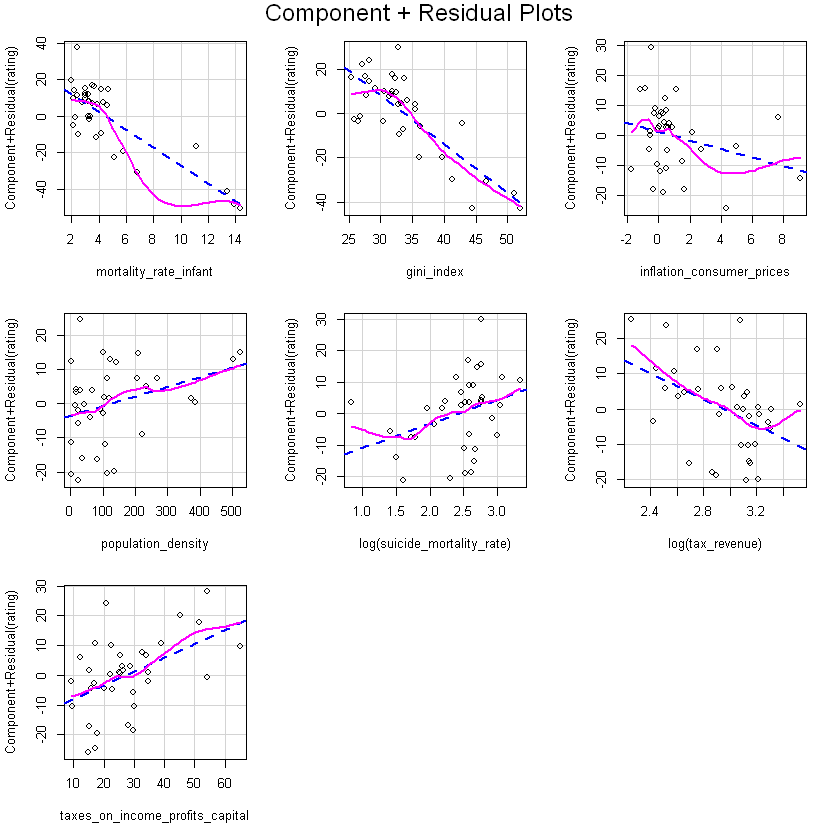

In [150]:
crPlots(ols_2015)

In [151]:
vif_values2015 <- vif(ols_2015)
print(vif_values2015)

          mortality_rate_infant                      gini_index 
                       5.747432                        4.419955 
      inflation_consumer_prices              population_density 
                       2.816829                        1.080002 
    log(suicide_mortality_rate)                log(tax_revenue) 
                       2.108238                        1.373241 
taxes_on_income_profits_capital 
                       1.063425 



	studentized Breusch-Pagan test

data:  ols_2015
BP = 4.3522, df = 7, p-value = 0.7384


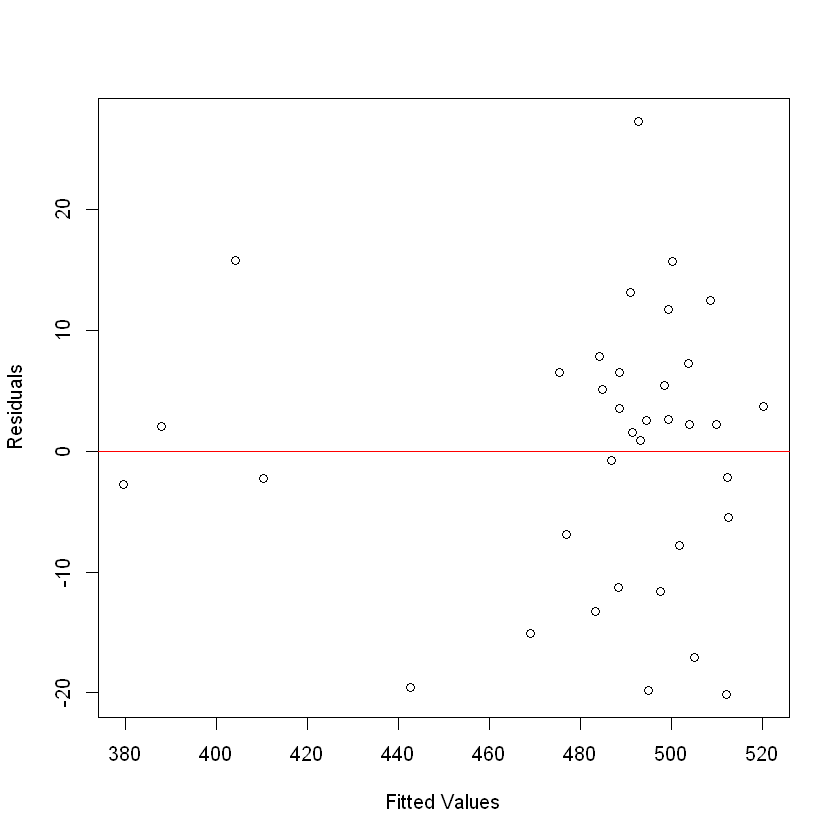

In [152]:
#Homoscedasticity: Check for constant variance of residuals. Use Breusch-Pagan test and plot residuals vs. fitted values.
bptest(ols_2015)

plot(ols_2015$fitted.values, residuals(ols_2015), xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red")


	Shapiro-Wilk normality test

data:  residuals(ols_2015)
W = 0.96825, p-value = 0.3797


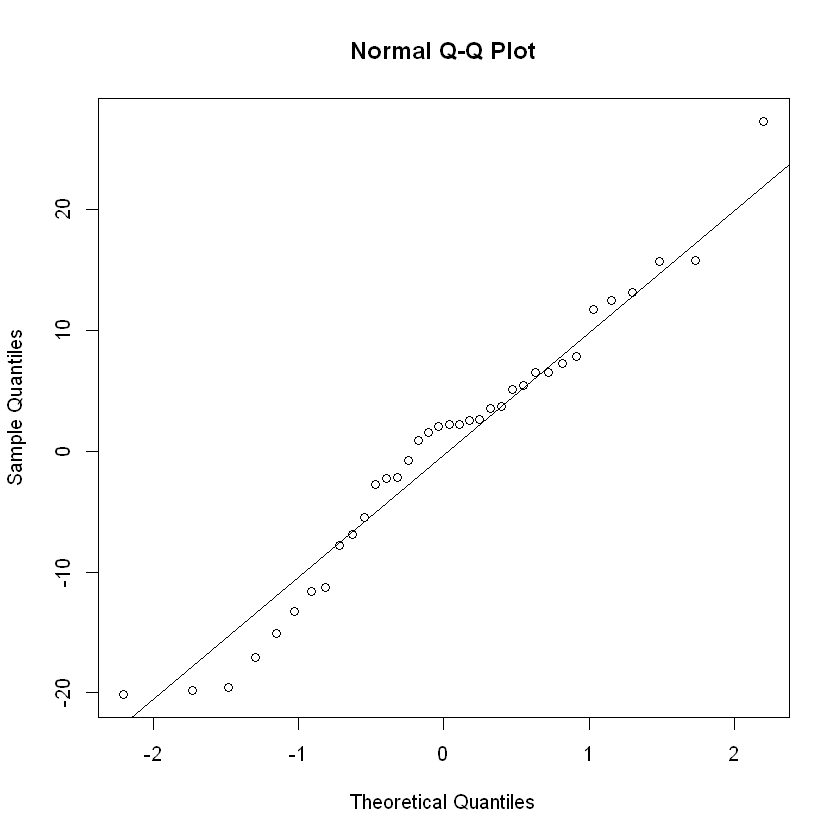

In [153]:
#Normality of Residuals: Test if residuals are normally distributed. Use Shapiro-Wilk test and Q-Q plot.
shapiro.test(residuals(ols_2015))
# high p-value indicates that there is not enough evidence to reject the null hypothesis of normality! Nice, we have normality

qqnorm(residuals(ols_2015))
qqline(residuals(ols_2015))

### Bootstrap 

In [40]:
library(boot)


Attaching package: 'boot'

The following object is masked from 'package:car':

    logit



In [77]:
# given our small sample size, it might be convenient to use bootstrap as an alternative to OLS

# Function to obtain regression coefficients
boot_function <- function(data, indices) {
  boot_data <- data[indices, ] # Resampling with replacement
  model <- lm(rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
                population_density + log(suicide_mortality_rate) + log(tax_revenue) +
                taxes_on_income_profits_capital, data = boot_data)
  return(coef(model))
}

# Perform bootstrap
set.seed(123) # For reproducibility
boot_results_2018 <- boot(data = data_2018, statistic = boot_function, R = 100000)

# Summarize results - 100k repetitions!!
boot_results_2018



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_2018, statistic = boot_function, R = 1e+05)


Bootstrap Statistics :
        original        bias    std. error
t1* 568.00841637 -1.9723239365  46.5271515
t2*  -5.07480902  0.1482479860   1.8892671
t3*  -2.67781268  0.0095812784   0.7557819
t4*   3.11322926 -1.0616838522   2.8879968
t5*   0.03781722 -0.0007776415   0.0157523
t6*  16.06388201  0.5929726834   6.3457833
t7* -12.33733779  0.7551311080   8.5453830
t8*   0.47917727 -0.0136017795   0.1875499

### doing LAD - good for smaller sample - more robust to outliers

In [97]:
library("quantreg")
#library("repr")

In [99]:
quantile_2018 <- rq(rating ~ mortality_rate_infant+	gini_index + inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+	log(tax_revenue) 
                    + taxes_on_income_profits_capital, data = data_2018, tau=seq(0.05, 0.95, by=0.05))
print(quantile_2018)


Call:
rq(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    +population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, tau = seq(0.05, 0.95, by = 0.05), 
    data = data_2018)

Coefficients:
                                   tau= 0.05    tau= 0.10    tau= 0.15
(Intercept)                     552.77168882 554.91419706 554.24033660
mortality_rate_infant            -6.24270487  -5.22826471  -5.29014738
gini_index                       -2.99321912  -2.83260998  -2.82021557
inflation_consumer_prices         4.32490424   3.82817049   3.84953771
population_density                0.05090579   0.04349391   0.04061554
log(suicide_mortality_rate)       7.43403306   8.76314863   8.94563029
log(tax_revenue)                 -2.58665129  -7.10830732  -7.35038344
taxes_on_income_profits_capital   0.47730528   0.60483193   0.66774175
                                   tau= 0.20    tau= 0.25    tau= 0.30
(Intercept)

In [115]:
# LAD regression using rq() from the quantreg package
lad_model <- rq(rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
                population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
                taxes_on_income_profits_capital, data = data_2018, tau = 0.5)

# Print the LAD model summary
lad_summary <- summary(lad_model)
print(lad_summary)
summary(lad_model)


Call: rq(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, tau = 0.5, data = data_2018)

tau: [1] 0.5

Coefficients:
                                coefficients lower bd  upper bd 
(Intercept)                     556.01462    479.61178 624.53640
mortality_rate_infant            -4.63331     -8.18318  -1.26430
gini_index                       -2.65156     -4.41404  -0.99417
inflation_consumer_prices         2.80744    -10.13056   9.49112
population_density                0.04274     -0.00759   0.06701
log(suicide_mortality_rate)      14.23554      6.02422  29.99336
log(tax_revenue)                 -7.20228    -19.68188   8.43182
taxes_on_income_profits_capital   0.51699      0.18446   0.89771



Call: rq(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, tau = 0.5, data = data_2018)

tau: [1] 0.5

Coefficients:
                                coefficients lower bd  upper bd 
(Intercept)                     556.01462    479.61178 624.53640
mortality_rate_infant            -4.63331     -8.18318  -1.26430
gini_index                       -2.65156     -4.41404  -0.99417
inflation_consumer_prices         2.80744    -10.13056   9.49112
population_density                0.04274     -0.00759   0.06701
log(suicide_mortality_rate)      14.23554      6.02422  29.99336
log(tax_revenue)                 -7.20228    -19.68188   8.43182
taxes_on_income_profits_capital   0.51699      0.18446   0.89771

In [116]:
# Assuming lad_model is your LAD regression model fitted using rq()
# Summary of the LAD model with bootstrap standard errors
lad_summary <- summary(lad_model, se = "boot")

# Print the summary to see coefficients, standard errors, and more
print(lad_summary)



Call: rq(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, tau = 0.5, data = data_2018)

tau: [1] 0.5

Coefficients:
                                Value     Std. Error t value   Pr(>|t|) 
(Intercept)                     556.01462  76.98493    7.22238   0.00000
mortality_rate_infant            -4.63331   2.87957   -1.60903   0.11808
gini_index                       -2.65156   1.37589   -1.92716   0.06348
inflation_consumer_prices         2.80744   3.57796    0.78465   0.43881
population_density                0.04274   0.02306    1.85344   0.07368
log(suicide_mortality_rate)      14.23554   9.91766    1.43537   0.16153
log(tax_revenue)                 -7.20228  13.90725   -0.51788   0.60834
taxes_on_income_profits_capital   0.51699   0.26518    1.94957   0.06063


In [117]:
# Summary of the LAD model with bootstrap standard errors explicitly requested
lad_summary2 <- summary(lad_model, se = "boot", method = "boot")

# Attempt to print the summary to see if standard errors are included
print(lad_summary2)



Call: rq(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, tau = 0.5, data = data_2018)

tau: [1] 0.5

Coefficients:
                                Value     Std. Error t value   Pr(>|t|) 
(Intercept)                     556.01462  69.97434    7.94598   0.00000
mortality_rate_infant            -4.63331   3.05194   -1.51815   0.13944
gini_index                       -2.65156   1.36012   -1.94950   0.06064
inflation_consumer_prices         2.80744   4.06505    0.69063   0.49511
population_density                0.04274   0.02936    1.45593   0.15580
log(suicide_mortality_rate)      14.23554  10.59855    1.34316   0.18929
log(tax_revenue)                 -7.20228  12.45074   -0.57846   0.56727
taxes_on_income_profits_capital   0.51699   0.26752    1.93253   0.06278


In [123]:
# Check median/mean of residuals
# Median/Mean of residuals
print(median_residuals_lad <- median(resid(lad_model)))
print(mean_residuals_ols <- mean(resid(ols_2018)))


[1] -5.684342e-14
[1] 3.541347e-17


##  Observing gender differences

In [154]:
#we will start with observing only effect on all individuals together, later we will also explore differences between males and females
# we will look only at year 2018, but this time we will use both genders
# Creating a subset of the data for the year 2018 and gender either BOY or GIRL
gender_data <- data[data$time == 2018 & (data$sex == "BOY" | data$sex == "GIRL"), ]

# Creating a dummy variable for girls
gender_data$girl_dummy <- ifelse(gender_data$sex == "GIRL", 1, 0)

# Display the first few rows of the subset to verify
head(gender_data)

,index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,...,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating,girl_dummy
16,AUS-2018,5.12431,3.2,34.3,50251.34,1.911401,0.8847350,5.300,24.36526,3.245345,...,23.17720,65.16415,NA,7.203527,86.012,AUS,2018,BOY,494,0
17,AUS-2018,5.12431,3.2,34.3,50251.34,1.911401,0.8847350,5.300,24.36526,3.245345,...,23.17720,65.16415,NA,7.203527,86.012,AUS,2018,GIRL,488,1
31,AUT-2018,5.22655,2.9,30.8,56937.94,1.998380,0.9727943,4.933,24.09513,107.131859,...,25.41750,27.48498,NA,7.705019,58.297,AUT,2018,BOY,505,0
32,AUT-2018,5.22655,2.9,30.8,56937.94,1.998380,0.9727943,4.933,24.09513,107.131859,...,25.41750,27.48498,NA,7.705019,58.297,AUT,2018,GIRL,492,1
49,BEL-2018,6.38107,3.4,27.2,52530.56,2.053165,NA,5.948,23.62267,377.379590,...,24.00857,34.00176,NA,8.333813,98.001,BEL,2018,BOY,514,0
50,BEL-2018,6.38107,3.4,27.2,52530.56,2.053165,NA,5.948,23.62267,377.379590,...,24.00857,34.00176,NA,8.333813,98.001,BEL,2018,GIRL,502,1


In [155]:
#simple  OLS
ols_gender <- lm(rating ~ girl_dummy, data = gender_data)
# Get the summary of the model
summary(ols_gender)
#so women tent to score worse, on average, but insignificantly


Call:
lm(formula = rating ~ girl_dummy, data = gender_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.564   -4.314   10.936   23.051   44.897 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  487.103      5.950  81.860   <2e-16 ***
girl_dummy    -5.538      8.415  -0.658    0.512    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.16 on 76 degrees of freedom
Multiple R-squared:  0.005667,	Adjusted R-squared:  -0.007416 
F-statistic: 0.4332 on 1 and 76 DF,  p-value: 0.5124


In [156]:
ols_gender_full <- lm(rating ~ girl_dummy +mortality_rate_infant+	gini_index + inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+	tax_revenue + taxes_on_income_profits_capital, data = gender_data)
# Get the summary of the model
summary(ols_gender_full)
#so women tend to score worse, on average


Call:
lm(formula = rating ~ girl_dummy + mortality_rate_infant + gini_index + 
    inflation_consumer_prices + +population_density + log(suicide_mortality_rate) + 
    tax_revenue + taxes_on_income_profits_capital, data = gender_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.153  -8.633   2.007   7.510  27.955 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     542.73895   22.10448  24.553  < 2e-16 ***
girl_dummy                       -5.42105    3.00247  -1.806 0.075484 .  
mortality_rate_infant            -5.00793    1.08104  -4.633 1.72e-05 ***
gini_index                       -2.64219    0.41441  -6.376 1.95e-08 ***
inflation_consumer_prices         3.05653    0.76959   3.972 0.000177 ***
population_density                0.03755    0.01152   3.258 0.001761 ** 
log(suicide_mortality_rate)      16.57909    4.22890   3.920 0.000210 ***
tax_revenue                      -0.55089    0.32535  -1.693 0.

### Checking if regression is different for males and females

In [157]:
boys <- data[data$time == 2018 & (data$sex == "BOY"), ]
# Display the first few rows of the subset to verify
head(boys)

,index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
16,AUS-2018,5.12431,3.2,34.3,50251.34,1.911401,0.8847350,5.300,24.36526,3.245345,12.4,23.17720,65.16415,NA,7.203527,86.012,AUS,2018,BOY,494
31,AUT-2018,5.22655,2.9,30.8,56937.94,1.998380,0.9727943,4.933,24.09513,107.131859,15.7,25.41750,27.48498,NA,7.705019,58.297,AUT,2018,BOY,505
49,BEL-2018,6.38107,3.4,27.2,52530.56,2.053165,NA,5.948,23.62267,377.379590,18.7,24.00857,34.00176,NA,8.333813,98.001,BEL,2018,BOY,514
67,CAN-2018,4.88898,4.6,32.5,49992.76,2.268226,1.7874861,5.837,22.67609,4.134149,12.0,13.05768,55.21804,NA,7.577101,81.411,CAN,2018,BOY,514
82,CHL-2018,5.47306,6.3,44.9,25564.54,2.434890,4.4114225,7.235,23.04979,25.152179,8.8,18.39552,36.67938,NA,4.654511,87.564,CHL,2018,BOY,421
89,COL-2018,4.44910,12.2,50.4,15161.32,3.240569,26.2313252,9.360,21.22787,44.413665,4.0,14.60984,26.56603,NA,5.460899,80.778,COL,2018,BOY,401


In [158]:
girls <- data[data$time == 2018 & (data$sex == "GIRL"), ]

# Display the first few rows of the subset to verify
head(girls)

,index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
17,AUS-2018,5.12431,3.2,34.3,50251.34,1.911401,0.8847350,5.300,24.36526,3.245345,12.4,23.17720,65.16415,NA,7.203527,86.012,AUS,2018,GIRL,488
32,AUT-2018,5.22655,2.9,30.8,56937.94,1.998380,0.9727943,4.933,24.09513,107.131859,15.7,25.41750,27.48498,NA,7.705019,58.297,AUT,2018,GIRL,492
50,BEL-2018,6.38107,3.4,27.2,52530.56,2.053165,NA,5.948,23.62267,377.379590,18.7,24.00857,34.00176,NA,8.333813,98.001,BEL,2018,GIRL,502
68,CAN-2018,4.88898,4.6,32.5,49992.76,2.268226,1.7874861,5.837,22.67609,4.134149,12.0,13.05768,55.21804,NA,7.577101,81.411,CAN,2018,GIRL,510
83,CHL-2018,5.47306,6.3,44.9,25564.54,2.434890,4.4114225,7.235,23.04979,25.152179,8.8,18.39552,36.67938,NA,4.654511,87.564,CHL,2018,GIRL,414
90,COL-2018,4.44910,12.2,50.4,15161.32,3.240569,26.2313252,9.360,21.22787,44.413665,4.0,14.60984,26.56603,NA,5.460899,80.778,COL,2018,GIRL,381


In [159]:
#simple  OLS
ols_2018_boys <- lm(rating ~ mortality_rate_infant+	gini_index + inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+	log(tax_revenue) + taxes_on_income_profits_capital, data = boys)
# Get the summary of the model
summary(ols_2018_boys)


Call:
lm(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    +population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, data = boys)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.888 -10.727   1.026   7.749  24.494 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     559.76179   45.58302  12.280 3.13e-13 ***
mortality_rate_infant            -4.67880    1.64451  -2.845 0.007926 ** 
gini_index                       -2.52963    0.63015  -4.014 0.000367 ***
inflation_consumer_prices         2.94688    1.16764   2.524 0.017139 *  
population_density                0.03967    0.01752   2.264 0.030972 *  
log(suicide_mortality_rate)      16.92579    6.42026   2.636 0.013144 *  
log(tax_revenue)                -11.68894    9.05559  -1.291 0.206633    
taxes_on_income_profits_capital   0.49728    0.18346   2.711 0.011000 *  
---


In [160]:
#simple  OLS
ols_2018_girls <- lm(rating ~ mortality_rate_infant+	gini_index + inflation_consumer_prices + 
               +population_density	+log(suicide_mortality_rate)+	log(tax_revenue) + taxes_on_income_profits_capital, data = girls)
# Get the summary of the model
summary(ols_2018_girls)


Call:
lm(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    +population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, data = girls)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.250  -7.703   1.193   7.488  27.157 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     575.31035   42.11807  13.659 2.05e-14 ***
mortality_rate_infant            -5.52249    1.51950  -3.634  0.00103 ** 
gini_index                       -2.80708    0.58225  -4.821 3.86e-05 ***
inflation_consumer_prices         3.22305    1.07888   2.987  0.00556 ** 
population_density                0.03504    0.01619   2.164  0.03856 *  
log(suicide_mortality_rate)      15.37954    5.93223   2.593  0.01458 *  
log(tax_revenue)                -12.73507    8.36724  -1.522  0.13848    
taxes_on_income_profits_capital   0.45473    0.16951   2.683  0.01177 *  
---

In [161]:
# Combine the datasets and add an indicator variable for gender
data_combined <- rbind(boys, girls)
data_combined$gender <- rep(c("Boy", "Girl"), c(nrow(boys), nrow(girls)))

# Adjust variables for combined data
data_combined$suicide_mortality_rate_log <- log(data_combined$suicide_mortality_rate)
data_combined$tax_revenue_log <- log(data_combined$tax_revenue)

# Fit a pooled model without interaction terms, using gender as a factor
model_pooled <- lm(rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
                   population_density + suicide_mortality_rate_log + tax_revenue_log + 
                   taxes_on_income_profits_capital + factor(gender), data = data_combined)

# Fit a model with interaction terms to allow different slopes
model_interaction <- lm(rating ~ mortality_rate_infant * factor(gender) + gini_index * factor(gender) + 
                        inflation_consumer_prices * factor(gender) + population_density * factor(gender) + 
                        suicide_mortality_rate_log * factor(gender) + tax_revenue_log * factor(gender) + 
                        taxes_on_income_profits_capital * factor(gender), data = data_combined)

# Perform the Chow test by comparing the pooled model with the interaction model using anova
chow_test <- anova(model_pooled, model_interaction)

# Print the test results
print(chow_test)


Analysis of Variance Table

Model 1: rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    population_density + suicide_mortality_rate_log + tax_revenue_log + 
    taxes_on_income_profits_capital + factor(gender)
Model 2: rating ~ mortality_rate_infant * factor(gender) + gini_index * 
    factor(gender) + inflation_consumer_prices * factor(gender) + 
    population_density * factor(gender) + suicide_mortality_rate_log * 
    factor(gender) + tax_revenue_log * factor(gender) + taxes_on_income_profits_capital * 
    factor(gender)
  Res.Df   RSS Df Sum of Sq      F Pr(>F)
1     67 11247                           
2     60 11010  7    236.62 0.1842 0.9877


In [168]:
# Creating a subset of the data for individuals identified as either BOY or GIRL
# Assuming 'data' is your dataframe and it contains a column named 'sex' for gender
gender_data_time_series <- data[data$sex == "BOY" | data$sex == "GIRL", ]

# Creating a dummy variable for girls
gender_data_time_series$girl_dummy <- ifelse(gender_data_time_series$sex == "GIRL", 1, 0)

# Display the first few rows of the subset to verify
head(gender_data_time_series)


,index_code,expenditure_on._education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,...,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating,girl_dummy
1,AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,...,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,BOY,527,0
2,AUS-2003,5.246357,4.9,33.5,30121.82,2.732596,1.533073,5.933,26.05029,2.567036,...,24.29997,62.72655,NA,5.623778,84.343,AUS,2003,GIRL,522,1
4,AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,...,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,BOY,527,0
5,AUS-2006,4.738430,4.7,33.5,34846.72,3.555288,1.372940,4.785,27.78913,2.662089,...,24.51177,65.23156,NA,5.719998,84.700,AUS,2006,GIRL,513,1
7,AUS-2009,5.081320,4.2,33.5,40312.40,1.771117,1.214170,5.565,27.60185,2.823588,...,22.02101,64.95108,NA,6.244110,85.063,AUS,2009,BOY,519,0
8,AUS-2009,5.081320,4.2,33.5,40312.40,1.771117,1.214170,5.565,27.60185,2.823588,...,22.02101,64.95108,NA,6.244110,85.063,AUS,2009,GIRL,509,1


In [174]:
# OLS from more years combined
ols_gender_time <- lm(rating ~ girl_dummy, gender_data_time_series)
# Get the summary of the model
summary(ols_gender_time)




Call:
lm(formula = rating ~ girl_dummy, data = gender_data_time_series)

Residuals:
     Min       1Q   Median       3Q      Max 
-136.546   -8.248    7.454   23.454   67.966 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  494.148      2.602  189.94  < 2e-16 ***
girl_dummy    -9.602      3.679   -2.61  0.00939 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.7 on 418 degrees of freedom
Multiple R-squared:  0.01603,	Adjusted R-squared:  0.01368 
F-statistic: 6.811 on 1 and 418 DF,  p-value: 0.009386


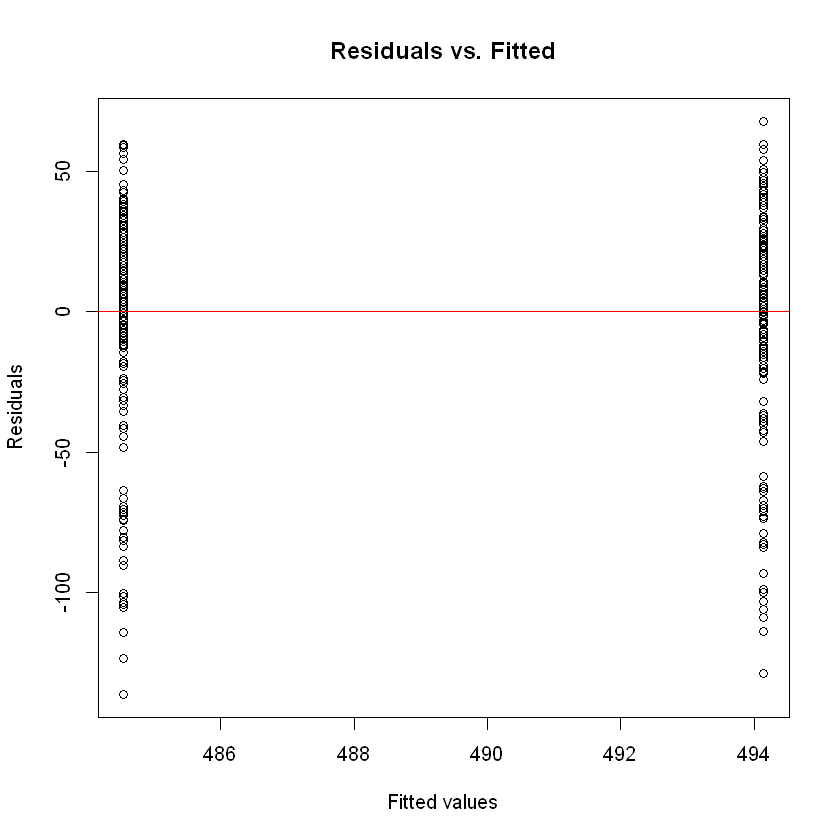

In [177]:
# linearity - Plotting the fitted values vs. residuals
plot(ols_gender_time$fitted.values, resid(ols_gender_time),
     xlab = "Fitted values", ylab = "Residuals", main = "Residuals vs. Fitted")
abline(h = 0, col = "red")

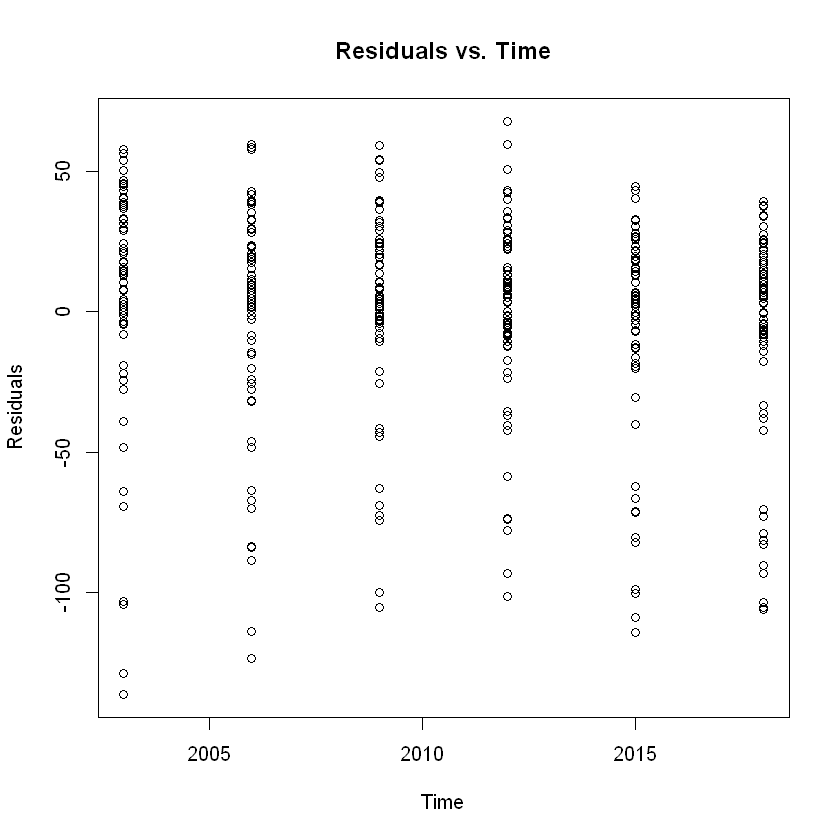

In [178]:
#independence of errors
plot(gender_data_time_series$time, resid(ols_gender_time),
     xlab = "Time", ylab = "Residuals", main = "Residuals vs. Time")

In [181]:
# homoscedasticity
library(car)
ncvTest(ols_gender_time)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2369695, Df = 1, p = 0.6264

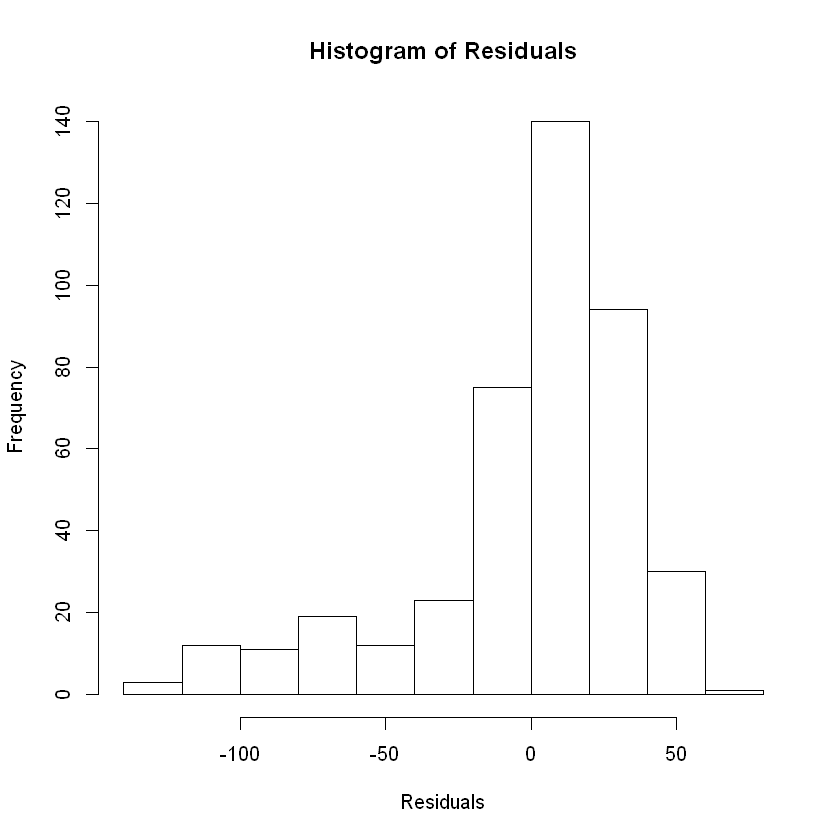

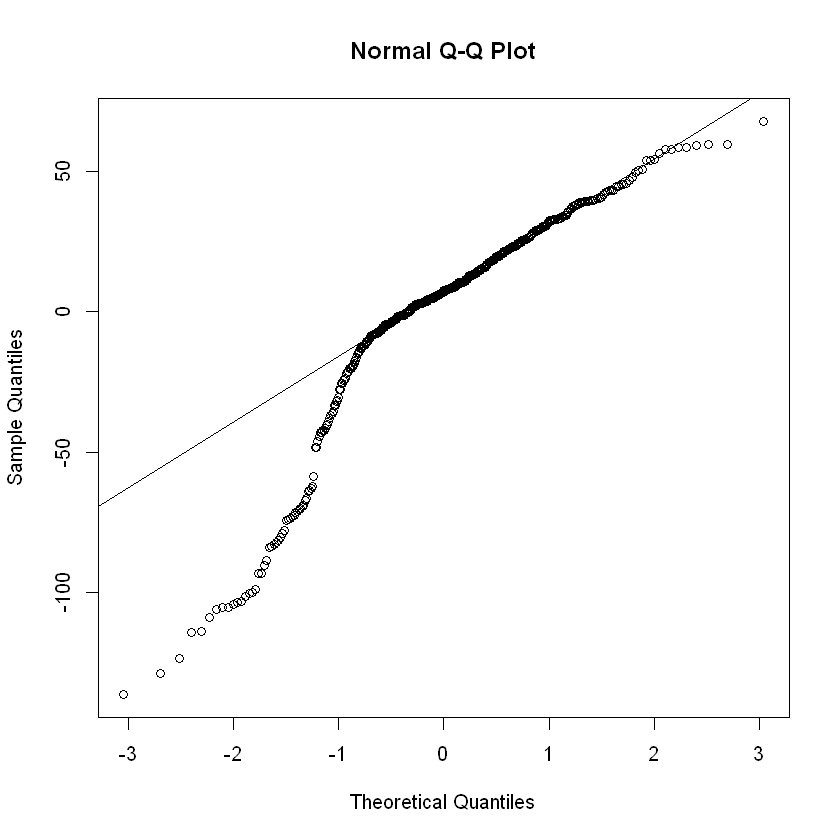

In [182]:
# Histogram of residuals
hist(resid(ols_gender_time), breaks = "Scott", main = "Histogram of Residuals", xlab = "Residuals")

# QQ plot of residuals
qqnorm(resid(ols_gender_time))
qqline(resid(ols_gender_time))



In [183]:
# White estimator
# Load necessary libraries
library(sandwich)
library(lmtest)

# Fit your OLS model (assuming this has already been done)
# ols_gender_time <- lm(rating ~ girl_dummy, data = gender_data_time_series)

# Calculate robust standard errors using the White estimator
robust_se <- vcovHC(ols_gender_time, type = "HC1")

# Display the summary of the model with robust standard errors
summary_robust <- coeftest(ols_gender_time, robust_se)

# Print the summary with robust standard errors
print(summary_robust)


t test of coefficients:

            Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 494.1481     2.5576 193.2102 < 2.2e-16 ***
girl_dummy   -9.6020     3.6793  -2.6098  0.009386 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [184]:
# FGLS
# Load the nlme package
library(nlme)

# Fit an FGLS model assuming heteroskedastic errors
# We use varIdent() to allow different variances per level of a factor
# Since you're concerned with gender, we might allow variance to differ by the 'girl_dummy' variable
fgls_model <- gls(rating ~ girl_dummy, data = gender_data_time_series,
                  weights = varIdent(form = ~ 1 | girl_dummy))

# Summary of the FGLS model
summary(fgls_model)


Generalized least squares fit by REML
  Model: rating ~ girl_dummy 
  Data: gender_data_time_series 
       AIC      BIC    logLik
  4239.116 4255.258 -2115.558

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | girl_dummy 
 Parameter estimates:
       0        1 
1.000000 1.034182 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 494.1481  2.557559 193.21080  0.0000
girl_dummy   -9.6020  3.679271  -2.60976  0.0094

 Correlation: 
           (Intr)
girl_dummy -0.695

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-3.5624334 -0.2206251  0.1944714  0.6192152  1.8338172 

Residual standard error: 37.06255 
Degrees of freedom: 420 total; 418 residual

## ANALYSIS OF PANEL DATA

In [170]:
if (!require(gplots)) install.packages("gplots")
if (!require(plm)) install.packages("plm")
if (!require(car)) install.packages("car")

library(sandwich)
library(foreign)
library(lmtest)
library(plm)
library(readr)
library(gplots) 
library(car)

library(repr)
options(repr.plot.width = 10, repr.plot.height = 8)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Loading required package: plm
Loading required package: Formula
Warning message:
"package 'readr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'readr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'hms'


In [ ]:
#we have unbalanced panel, oh no - I would like to do both, once drop all countries that cause imbalance once try to fix it somehow
pdim(data_f)

In [ ]:
coplot(rating ~ country|time, type = "b", data = data_f)
      

In [ ]:
plot(rating ~ gini_index, data_f)

In [ ]:
# Pooled OLS
pols <- plm(rating ~ mortality_rate_infant+	gini_index+	inflation_consumer_prices+population_density
            +log(suicide_mortality_rate)+log(tax_revenue)+taxes_on_income_profits_capital, data = data_f,
           index = c("country", "time"), model = "pooling")

            
summary(pols)

In [ ]:
#pooled OLS with robust standard errors
coeftest(pols, vcov = vcovHC(pols, type = "HC0", cluster = 'group'))

In [ ]:
# lovely how significant, however, we need to chceck the assumptions to know if it is legit to use pooled OLS

In [ ]:
# Convert data to a panel data frame
pdata <- pdata.frame(data_f, index = c("country", "time"))
head(pdata)

In [36]:
#Let's first assume that the heterogeneity is correlated to the explanatory variables.
#Run the fixed effects model
fe_model <- plm(rating ~ mortality_rate_infant+	gini_index+	inflation_consumer_prices+population_density
            +log(suicide_mortality_rate)+log(tax_revenue)+taxes_on_income_profits_capital, data =pdata, model = "within")

# Summary of the model
summary(fe_model)

Oneway (individual) effect Within Model

Call:
plm(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital, data = pdata, model = "within")

Unbalanced Panel: n = 37, T = 1-6, N = 172

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-21.2331  -4.4108   0.3799   4.8188  20.3861 

Coefficients:
                                 Estimate Std. Error t-value Pr(>|t|)  
mortality_rate_infant            0.502861   0.983067  0.5115  0.60987  
gini_index                      -1.481656   0.638455 -2.3207  0.02189 *
inflation_consumer_prices        0.559815   0.433325  1.2919  0.19872  
population_density               0.022759   0.092367  0.2464  0.80577  
log(suicide_mortality_rate)      2.479659   6.896282  0.3596  0.71977  
log(tax_revenue)                -2.125452  11.880317 -0.1789  0.85829  
taxes_on_income_profits_capital -0.244001   0.370812 

In [37]:
#Estimate fixed effects model using Least Square Dummy Variable (LSDV) and Within model.
lsdv <- lm(rating ~ mortality_rate_infant+	gini_index+	inflation_consumer_prices+population_density
            +log(suicide_mortality_rate)+log(tax_revenue)+taxes_on_income_profits_capital-1 , data = data_f)
summary(lsdv)


Call:
lm(formula = rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices + 
    population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
    taxes_on_income_profits_capital - 1, data = data_f)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.036 -23.767  -3.074  26.723  84.380 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
mortality_rate_infant           -1.29040    1.68925  -0.764  0.44597    
gini_index                       2.31451    0.56088   4.127 5.71e-05 ***
inflation_consumer_prices        1.01833    1.47311   0.691  0.49032    
population_density               0.08052    0.02217   3.632  0.00037 ***
log(suicide_mortality_rate)     71.37729    5.03632  14.173  < 2e-16 ***
log(tax_revenue)                71.43715    6.23862  11.451  < 2e-16 ***
taxes_on_income_profits_capital  0.61627    0.21844   2.821  0.00534 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stan

In [38]:
pFtest(fe_model, pols)
#we have found significant fixed effects!


	F test for individual effects

data:  rating ~ mortality_rate_infant + gini_index + inflation_consumer_prices +  ...
F = 10.66, df1 = 36, df2 = 128, p-value < 2.2e-16
alternative hypothesis: significant effects


In [39]:
#let us also try first-differences TBD!!! - I assume for that we will need two time periods
# Check for missing values in index variables
#table(is.na(data_f$country), useNA = "ifany")
#table(is.na(data_f$time), useNA = "ifany")

# Optionally, remove rows where index variables are NA
#data_f <- na.omit(data_f, cols = c("country", "time"))

# Convert to pdata.frame again
#pdata <- pdata.frame(data_f, index = c("country", "time"))

# Check for NA values in all columns
#colSums(is.na(data_f))

# Check the structure of the data
str(data_f)
summary(data_f)

'data.frame':	214 obs. of  20 variables:
 $ index_code                           : Factor w/ 214 levels "AUS-2003","AUS-2006",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ educ_exp                             : num  5.25 4.74 5.08 4.87 5.32 ...
 $ mortality_rate_infant                : num  4.9 4.7 4.2 3.6 3.3 3.2 4.3 3.9 3.3 3 ...
 $ gini_index                           : num  33.5 33.5 33.5 33.5 33.5 34.3 29.5 29.6 30.5 30.5 ...
 $ gdp_per_capita_ppp                   : num  30122 34847 40312 42867 46292 ...
 $ inflation_consumer_prices            : num  2.73 3.56 1.77 1.76 1.51 ...
 $ intentional_homicides                : num  1.533 1.373 1.214 1.069 0.991 ...
 $ unemployment                         : num  5.93 4.79 5.57 5.22 6.05 ...
 $ gross_fixed_capital_formation        : num  26.1 27.8 27.6 27.4 26.2 ...
 $ population_density                   : num  2.57 2.66 2.82 2.96 3.1 ...
 $ suicide_mortality_rate               : num  10.5 10.6 11.2 11.7 13.2 12.4 18.2 16.4 16.3 16 ...
 $ tax_revenue 

    index_code     educ_exp     mortality_rate_infant   gini_index   
 AUS-2003:  1   Min.   :3.040   Min.   : 1.900        Min.   :24.40  
 AUS-2006:  1   1st Qu.:4.461   1st Qu.: 3.000        1st Qu.:28.12  
 AUS-2009:  1   Median :5.058   Median : 3.700        Median :32.70  
 AUS-2012:  1   Mean   :5.237   Mean   : 5.062        Mean   :33.41  
 AUS-2015:  1   3rd Qu.:5.796   3rd Qu.: 5.100        3rd Qu.:35.20  
 AUS-2018:  1   Max.   :8.449   Max.   :25.300        Max.   :57.60  
 (Other) :208   NA's   :12                            NA's   :24     
 gdp_per_capita_ppp inflation_consumer_prices intentional_homicides
 Min.   :  9588     Min.   :-4.4781           Min.   : 0.0000      
 1st Qu.: 26081     1st Qu.: 0.7999           1st Qu.: 0.8336      
 Median : 34306     Median : 1.9801           Median : 1.0955      
 Mean   : 36177     Mean   : 2.3008           Mean   : 3.1191      
 3rd Qu.: 42994     3rd Qu.: 2.9912           3rd Qu.: 1.8424      
 Max.   :116499     Max.   :21.6

In [40]:
# We need to get rid of NAs to use RE, this is obviously problematic given our smaller sample size
# Load the data
dataRE = data_f

# Remove rows with any missing values
data_clean <- na.omit(dataRE)

# Now you can run your plm model on this cleaned dataset
rem <- plm(rating ~ mortality_rate_infant + inflation_consumer_prices + 
           population_density + log(suicide_mortality_rate) + log(tax_revenue) + 
           taxes_on_income_profits_capital, 
           data = data_clean, model = "random", effect = 'individual')
summary(rem)


ERROR: Error in plm.fit(object, data, model = models[1], effect = effect): empty model


In [41]:
# Check for constant variables
sapply(data_clean, function(x) length(unique(x)))

# Inspect the first few rows of the data
head(data_clean)

# Verify that all variables in the model formula are present in the dataset
names(data_clean)

index_code                              educ_exp 
                                   31                                    31 
                mortality_rate_infant                            gini_index 
                                   23                                    29 
                   gdp_per_capita_ppp             inflation_consumer_prices 
                                   31                                    31 
                intentional_homicides                          unemployment 
                                   31                                    31 
        gross_fixed_capital_formation                    population_density 
                                   31                                    31 
               suicide_mortality_rate                           tax_revenue 
                                   29                                    31 
      taxes_on_income_profits_capital        alcohol_consumption_per_capita 
                                   31                                    31 
government_health_expenditure_pct_gdp            urban_population_pct_total 
                                   31                                    31 
                              country                                  time 
                                   31                                     1 
                                  sex                                rating 
                                    1                                    25

,index_code,educ_exp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
15,AUS-2015,5.31552,3.3,33.5,46292.10,1.5083667,0.9907542,6.055,26.20234,3.100113,13.2,21.86642,64.89343,10.39030,7.234067,85.701,AUS,2015,TOT,494
30,AUT-2015,5.45658,3.0,30.5,49865.90,0.8965633,0.5091166,5.802,22.69671,104.734598,16.0,26.82617,28.70780,12.19174,7.511853,57.715,AUT,2015,TOT,497
66,CAN-2015,4.73938,4.7,33.7,44670.08,1.1252414,1.7099458,6.945,23.85058,3.982215,13.0,12.38981,54.01114,9.91687,7.591099,81.259,CAN,2015,TOT,516
81,CHL-2015,4.90390,6.8,44.4,22691.49,4.3487735,2.3446955,6.491,25.47037,24.034102,10.0,17.54608,29.82996,7.75342,3.986681,87.360,CHL,2015,TOT,423
85,COL-2015,4.47039,13.4,51.0,13378.68,4.9898312,27.1287644,8.572,23.37478,42.469336,4.1,15.79726,24.96492,5.01742,5.328892,79.764,COL,2015,TOT,390
108,CZE-2015,5.75182,2.5,25.9,33899.29,0.3093645,0.8362001,5.048,26.53805,136.589289,13.6,14.76956,14.90199,13.21968,5.917825,73.477,CZE,2015,TOT,492


[1] "index_code"                           
 [2] "educ_exp"                             
 [3] "mortality_rate_infant"                
 [4] "gini_index"                           
 [5] "gdp_per_capita_ppp"                   
 [6] "inflation_consumer_prices"            
 [7] "intentional_homicides"                
 [8] "unemployment"                         
 [9] "gross_fixed_capital_formation"        
[10] "population_density"                   
[11] "suicide_mortality_rate"               
[12] "tax_revenue"                          
[13] "taxes_on_income_profits_capital"      
[14] "alcohol_consumption_per_capita"       
[15] "government_health_expenditure_pct_gdp"
[16] "urban_population_pct_total"           
[17] "country"                              
[18] "time"                                 
[19] "sex"                                  
[20] "rating"

In [45]:
 
table(data_clean$time)

# Check the structure of your dataset
str(data_clean)


2015 
  31 

'data.frame':	31 obs. of  20 variables:
 $ index_code                           : Factor w/ 214 levels "AUS-2003","AUS-2006",..: 5 10 28 39 41 48 60 71 77 83 ...
 $ educ_exp                             : num  5.32 5.46 4.74 4.9 4.47 ...
 $ mortality_rate_infant                : num  3.3 3 4.7 6.8 13.4 2.5 3.5 2.4 2 3.2 ...
 $ gini_index                           : num  33.5 30.5 33.7 44.4 51 25.9 28.2 32.7 27.1 32.7 ...
 $ gdp_per_capita_ppp                   : num  46292 49866 44670 22691 13379 ...
 $ inflation_consumer_prices            : num  1.508 0.897 1.125 4.349 4.99 ...
 $ intentional_homicides                : num  0.991 0.509 1.71 2.345 27.129 ...
 $ unemployment                         : num  6.05 5.8 6.95 6.49 8.57 ...
 $ gross_fixed_capital_formation        : num  26.2 22.7 23.9 25.5 23.4 ...
 $ population_density                   : num  3.1 104.73 3.98 24.03 42.47 ...
 $ suicide_mortality_rate               : num  13.2 16 13 10 4.1 13.6 10.9 15.9 14 15.8 ...
 $ tax_reven

In [42]:
#RE
rem <- plm(rating ~ mortality_rate_infant+gini_index+	inflation_consumer_prices+population_density
            +log(suicide_mortality_rate)+log(tax_revenue)+taxes_on_income_profits_capital, data = data_f, model = "random", effect = 'individual')
summary(rem)


at least one couple (id-time) has NA in at least one index dimension in resulting pdata.frame
 to find out which, use e.g. table(index(your_pdataframe), useNA = "ifany")


ERROR: Error in plm.fit(object, data, model = models[1], effect = effect): empty model


In [43]:
phtest(fem_w, rem)

ERROR: Error in phtest(fem_w, rem): object 'fem_w' not found
